[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier-Stokes
=====
***

You see where this is going ... we'll do 2D diffusion now and next we will combine steps 6 and 7 to solve Burgers' equation. So make sure your previous steps work well before continuing.

Step 7: 2D Diffusion
----
***

And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion.  We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

In [1]:
%matplotlib inline

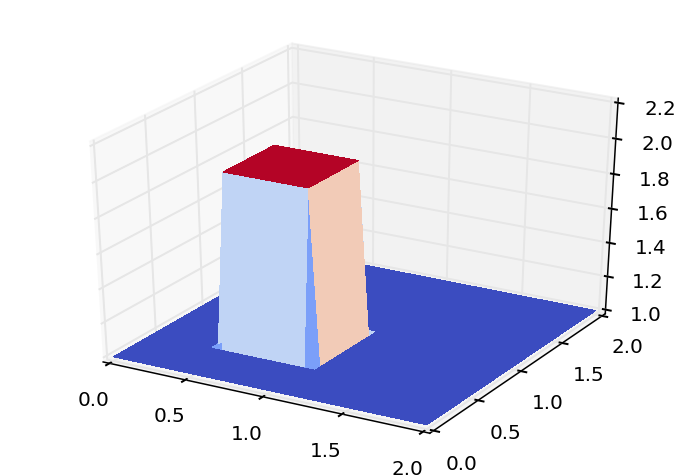

(1, 2.5)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
from matplotlib import cm ##cm = "colormap" for changing the 3d plot color palette

###variable declarations
nx = 31
ny = 31
nt = 17
nu=.05
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = .25
dt = sigma*dx*dy/nu

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) ##create a 1xn vector of 1's
un = np.ones((ny,nx)) ##

###Assign initial conditions

u[.5/dy:1/dy+1,.5/dx:1/dx+1]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
plt.show()
ax.set_xlim(1,2)
ax.set_ylim(1,2)
ax.set_zlim(1,2.5)
#ax.zaxis.set_major_locator(LinearLocator(5))

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

In [3]:
###Run through nt timesteps
def diffuse(nt):
    u[.5/dy:1/dy+1,.5/dx:1/dx+1]=2
    
    for n in range(nt+1): 
        un = u.copy()
        u[1:-1,1:-1]=un[1:-1,1:-1]+nu*dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+nu*dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])
        u[0,:]=1
        u[-1,:]=1
        u[:,0]=1
        u[:,-1]=1

    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=True)
    ax.set_zlim(1,2.5)
    plt.show()
    


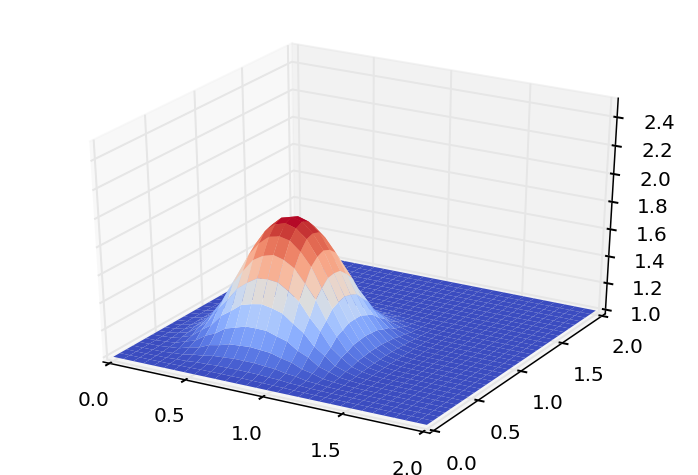

In [4]:
diffuse(10)

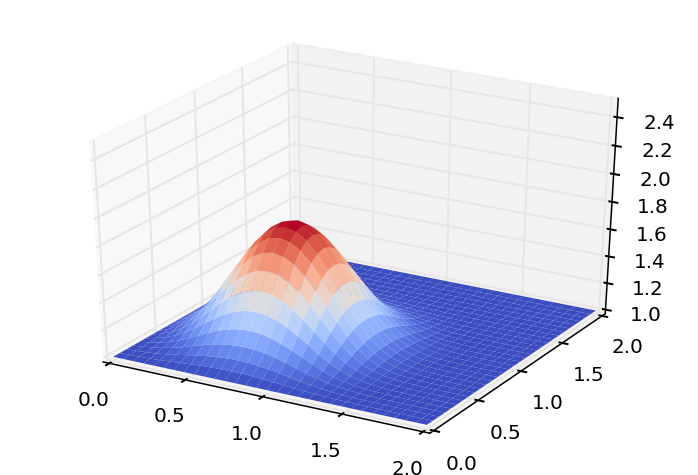

In [5]:
diffuse(14)

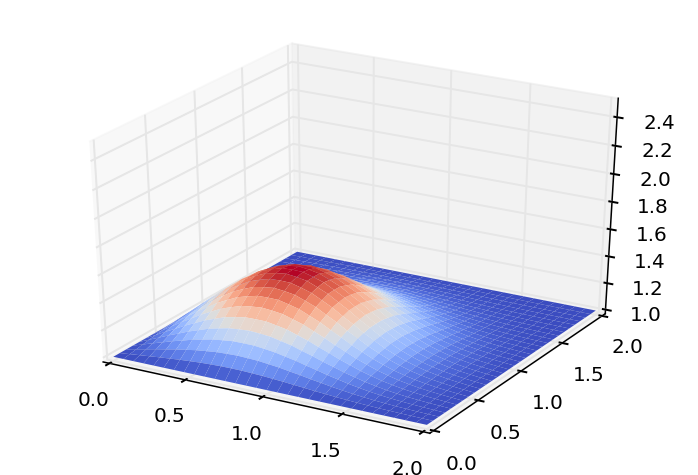

In [6]:
diffuse(50)

## Learn More

The video lesson that walks you through the details for Steps 5 to 8 is **Video Lesson 6** on You Tube:

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)